# Tool for analyzing trained models on the ePodium dataset

1. [Model Set-Up](#1)
2. [Visualization of the Input Data](#2)
3. [Analyzing the Trained Models](#3)


#### Import Packages
Note: This notebook may output tensorflow errors if cuda is not properly installed. The notebook still functions with these errors.

In [1]:
import mne
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import ipywidgets
import tensorflow as tf

from functions import epodium, epodium_deep_learning, display_helper
from models.dnn import fully_connected_model
from models.hfawaz import cnn, encoder

import local_paths

2022-09-16 14:21:24.563942: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-16 14:21:24.563982: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


<br>

<a id='1'></a>
## 1. Model Set-Up

#### Choose Deep Learning model
Choose from the trained modelsin the _local_paths.models_ folder. If the folder is empty, train the models in the _epodium_model_training_ notebook.

In [3]:
trained_models = sorted((f for f in os.listdir(local_paths.models) if not f.startswith(".")))
model_widget = ipywidgets.RadioButtons(options=trained_models,
                                       description='Models:',
                                       value='encoder_age_128_2')
display(model_widget)

RadioButtons(description='Models:', index=4, options=('encoder_2', 'encoder_3', 'encoder_age', 'encoder_age_12…

####  Choose which processed data to use
Choose from the different processed _experiment_event.npy_ files. If the _local_path.split_ folder is empty, process the raw ePodium files in the _epodium_processing_ notebook.

In [2]:
processing_methods = sorted((f for f in os.listdir(local_paths.split) if not f.startswith(".")))
processing_method_widget = ipywidgets.RadioButtons(options=processing_methods, 
                                                   description='processing:',
                                                   value = 'autoreject_128hz')
display(processing_method_widget)

RadioButtons(description='processing:', options=('autoreject_128hz', 'autoreject_512hz', 'ransac_512hz'), valu…

#### Load model

In [15]:
# Set model paths
base_path = os.path.join(local_paths.models, model_widget.value)

path_history = os.path.join(base_path, "history.npy")
path_model = os.path.join(base_path, "model")
path_testset = os.path.join(base_path, "testset.txt")
path_weights = os.path.join(base_path, "weights.h5")

# Load Model
if(os.path.exists(path_model)):
    print(f"Loading Model: '{model_widget.value}'.")
    
    # Loads the entire model from a folder:
    model = tf.keras.models.load_model(path_model)
    model.load_weights(path_weights)
    # Reads the test-set of the trained model and puts the experiment names into a list:
    testset = open(path_testset, "r").read().split()
    # Loads the training history dictionary:
    history = np.load(path_history, allow_pickle=True).item()
else: print("Model not found")

Loading Model: 'encoder_age_128_3'.


<br>

<a id='2'></a>
## 2. Visualization of the Input Data 

#### Visualise a data instance of the test sequence

208
The shape of one data instance is (64, 128)


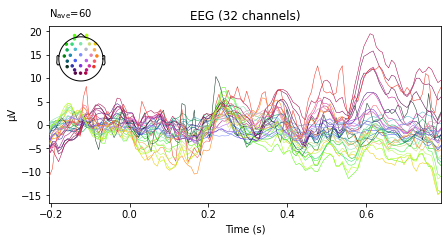

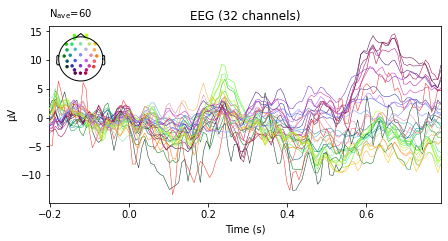

The data instance has shape: (64, 128)


In [6]:
# TODO Create widget

test_sequence = epodium_deep_learning.EvokedDataIterator(testset, "autoreject_128hz", n_experiments_batch = 1)

x, y = test_sequence.__getitem__(0, True)
print(f"The shape of one data instance is {x[0].shape}")

index = 3 # 0 to 63

epodium.plot_array_as_evoked(x[index][:32], frequency = 128)
epodium.plot_array_as_evoked(x[index][32:], frequency = 128)

print(f"The data instance has shape: {x[index].shape}")

<br>

<a id='3'></a>
## 3. Analyzing the Trained Models

#### Show Loss of Training History

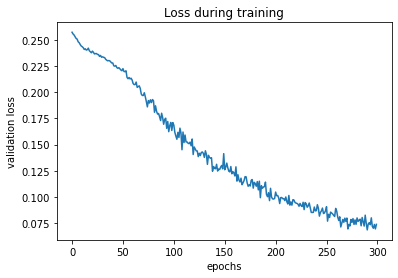

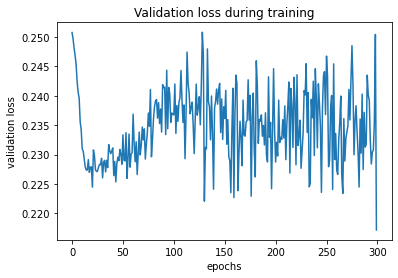

In [11]:
display_helper.show_plot(x = range(len(history['loss'])), y = history['loss'] ,xlabel = "epochs", ylabel = "validation loss", title = "Loss during training")
display_helper.show_plot(x = range(len(history['loss'])), y = history['val_loss'] ,xlabel = "epochs", ylabel = "validation loss", title = "Validation loss during training")

#### Make predictions on test set

In [8]:
print(f"The data instance has shape: {x[index].shape}")
x, y = train_sequence.__getitem__(50)

print(np.squeeze(model.predict(x)))
model.compute_loss(x=x, y=y, y_pred=np.squeeze(model.predict(x)))

The data instance has shape: (64, 128)


NameError: name 'train_sequence' is not defined

In [ ]:
x[1].shape

In [ ]:
print(model.predict(x[1]))


In [ ]:
# Loop over test_set, analyse each file x amount of time

for testfile in testset: 
    
    
    
    
    test_experiment = epodium_deep_learning.EvokedDataIterator([testfile], path_processed, n_experiments_batch = 8)

    index = 16
    x, y = test_experiment.__getitem__(0)
    epodium.plot_array_as_evoked(x[index])
    
    print(model.predict(x[index]))


    
    break

    # Load 

In [ ]:
len(x)

In [14]:
### OLD!



#     label_sex = 'male' if y[index][0] else 'female'
#     label_risk = 'risk' if y[index][1] else 'no risk'
#     label_event = 'deviant' if y[index][2] else 'standard'

#     print (f"{int(y[index][0])}: {label_sex}, \
#          {int(y[index][1])}: {label_risk}, \
#          {int(y[index][2])}: {label_event}")